# Lesson 9 Practical Application
## C2C Izaiah LaDuke

In [21]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
tips=Table.read_table("tips.csv")

1.) The tips.csv dataset contains data on tips collected from a restaurant.
a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for
males overlaid with a histogram of tips for females. Discuss what you found.
b. Repeat part a, but broken down by time.

In [33]:
tips.select('tip','sex').group('sex',np.mean)

sex,tip mean
Female,2.83345
Male,3.08962


Part A)

C:\Users\C20Izaiah.LaDuke\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


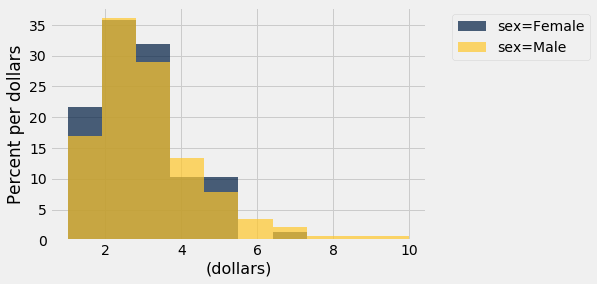

In [6]:
tips.hist('tip',unit='dollars', group='sex')

Part B)

In [34]:
tips.select('tip','time').group('time',np.mean)

time,tip mean
Dinner,3.10267
Lunch,2.72809


C:\Users\C20Izaiah.LaDuke\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


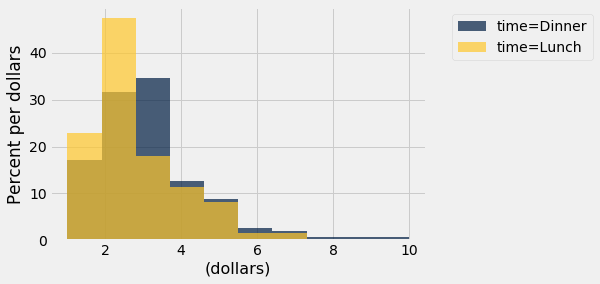

In [35]:
tips.hist('tip',unit='dollars', group='time')

2) Create a function called weekday_to_num. This function inputs a string denoting day of
the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues =
2, … Sun = 7).

In [7]:
def weekday_to_num(x):
    if x == 'Mon':
        return 1
    elif x=='Tues':
        return 2
    elif x=='Wed':
        return 3
    elif x=='Thur':
        return 4
    elif x=='Fri':
        return 5
    elif x=='Sat':
        return 6
    elif x=='Sun':
        return 7

Here is a test for the function

In [26]:
print(weekday_to_num('Mon'))
print(weekday_to_num('Sun'))

1
7


3) Apply this function to the day column of tips and include the result as a new column in
tips, called weekday_num.

In [28]:
tips.with_column('weekday_num',tips.apply(weekday_to_num,'day'))

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4) Create a function called est_tip. The goal of this function is to predict tip amount
based on the value of the bill (total_bill). To do this, we will look at “nearby” values
(i.e. tip, where the value of total_bill is near the value of interest.) For example, if
we want to predict the tip for total bill value of $20, we will simply look at all total bills near $20 and average the tip amount. The input of est_tip should be the total bill
amount and the window, or the difference in total bill we would consider “nearby”. For
example, for a window of $1, we will look at all bills totaling $19 thru $21. The output of
this function will be the predicted tip amount.

In [29]:
def est_tip(bill,window):
    return np.average(tips.where('total_bill',are.between(bill-window,bill+window)).column(1))

In [30]:
my_tips=tips.with_columns('Predicted Tip',tips.apply(lambda x: est_tip(x,10),'total_bill'))
my_tips

total_bill,tip,sex,smoker,day,time,size,Predicted Tip
16.99,1.01,Female,No,Sun,Dinner,2,2.69279
10.34,1.66,Male,No,Sun,Dinner,3,2.39717
21.01,3.5,Male,No,Sun,Dinner,3,2.92876
23.68,3.31,Male,No,Sun,Dinner,2,3.17346
24.59,3.61,Female,No,Sun,Dinner,4,3.24286
25.29,4.71,Male,No,Sun,Dinner,4,3.3137
8.77,2,Male,No,Sun,Dinner,2,2.35281
26.88,3.12,Male,No,Sun,Dinner,4,3.48058
15.04,1.96,Male,No,Sun,Dinner,2,2.62133
14.78,3.23,Male,No,Sun,Dinner,2,2.61529


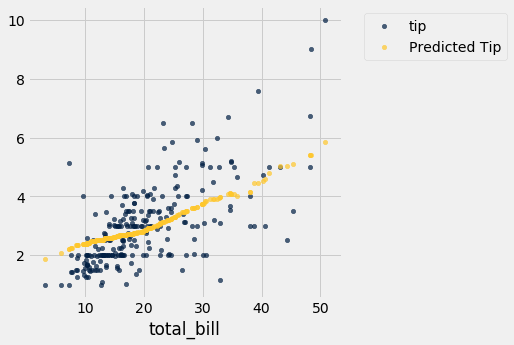

In [31]:
data=my_tips.select('total_bill','tip','Predicted Tip')
data.scatter('total_bill',overlay=True)